In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('df_features.csv')

In [17]:
cols = [col for col in df.columns.values if 'chroma' not in col]

In [20]:
df = df[cols]

In [21]:
df.head()

,track_id,track_title,artis_name,track_genre_top,mfcc_kurtosis,mfcc.1_kurtosis,mfcc.2_kurtosis,mfcc.3_kurtosis,mfcc.4_kurtosis,mfcc.5_kurtosis,...,tonnetz.39_std,tonnetz.40_std,tonnetz.41_std,zcr_kurtosis,zcr.1_max,zcr.2_mean,zcr.3_median,zcr.4_min,zcr.5_skew,zcr.6_std
0,135,Father's Day,Abominog,Rock,2.021638,0.269172,0.755836,0.861484,1.909718,0.382428,...,0.104279,0.016731,0.020464,-0.038451,0.234863,0.050837,0.050781,0.003418,0.297873,0.024899
1,136,Peel Back The Mountain Sky,Abominog,Rock,13.691644,0.702855,2.484976,7.980183,0.209275,1.472870,...,0.076808,0.017915,0.016706,0.558770,0.147461,0.036686,0.034180,0.003418,0.805020,0.016905
2,137,Side A,Airway,Experimental,24.767420,1.551722,1.896822,-0.059702,-0.489578,-0.104813,...,0.041466,0.011149,0.011149,40.950294,0.619629,0.088439,0.086914,0.000000,3.275552,0.021831
3,138,Side B,Airway,Experimental,4.569541,-0.495977,0.459000,3.558457,1.234007,0.221980,...,0.045315,0.012823,0.012725,5.126394,0.627441,0.102232,0.099121,0.004883,0.633483,0.034676
4,139,CandyAss,Alec K. Redfearn & the Eyesores,Folk,5.037508,1.186239,5.870653,1.431203,-0.306273,0.125341,...,0.090518,0.017428,0.021490,1.157352,0.261230,0.070760,0.066895,0.000977,0.769163,0.030017


In [22]:
X,y = df.iloc[:,4:],df.iloc[:,3]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
#KNN

In [37]:
KNN = KNeighborsClassifier()

In [38]:
parameters = {"n_neighbors" : [3,6,10,15]}

In [39]:
clf = GridSearchCV(estimator=KNN, param_grid=parameters, scoring = 'accuracy', verbose = 1)

In [40]:
clf.fit(X_train,y_train) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 6, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [41]:
clf.best_score_,clf.best_estimator_

(0.55628392912014746,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=15, p=2,
            weights='uniform'))

In [42]:
KNN = clf.best_estimator_

In [43]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [44]:
y_pred = KNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.56207111665626952

In [45]:
KNN_pred = pd.crosstab(y_test, y_pred, rownames=['Actual Genres'], colnames=['Predicted Genres'])
KNN_pred

Predicted Genres,Electronic,Experimental,Folk,Rock
Actual Genres,,,,
Electronic,627,186,34,280
Experimental,330,472,86,490
Folk,31,123,95,125
Rock,192,174,55,1509


In [46]:
#RandomForest

In [47]:
RFC = RandomForestClassifier()

In [48]:
parameters = {"n_estimators" : [10,20,30,40], "max_depth" : [10,20,30,40]}

In [49]:
clf = GridSearchCV(estimator=RFC, param_grid=parameters, scoring = 'accuracy', verbose = 1)

In [50]:
clf.fit(X_train,y_train)    

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40], 'max_depth': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [51]:
clf.best_score_,clf.best_estimator_

(0.70910580764109388,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=40, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [52]:
RFC = clf.best_estimator_

In [53]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_pred = RFC.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.72447494281555413

In [56]:
RFC_pred = pd.crosstab(y_test, y_pred, rownames=['Actual Genres'], colnames=['Predicted Genres'])
RFC_pred

Predicted Genres,Electronic,Experimental,Folk,Rock
Actual Genres,,,,
Electronic,775,228,7,117
Experimental,178,954,26,220
Folk,13,92,170,99
Rock,107,208,30,1585


In [57]:
#GradientBoosting

In [71]:
parameters = {'min_samples_split': [80,100], 'min_samples_leaf': [20,40], 'max_depth': [5,8]}

In [58]:
GBC = GradientBoostingClassifier(min_samples_split = 100, min_samples_leaf = 30, max_depth = 5, 
                                 max_features = 'sqrt', subsample = 0.8)

In [72]:
GBC = GradientBoostingClassifier()

In [73]:
clf = GridSearchCV(estimator=GBC, param_grid=parameters, scoring = 'accuracy', verbose = 1)

In [74]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 109.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [80, 100], 'max_depth': [5, 8], 'min_samples_leaf': [20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [75]:
clf.best_score_,clf.best_estimator_

(0.75898801597869503,
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=8,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=40, min_samples_split=80,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))

In [76]:
GBC = clf.best_estimator_

In [77]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [78]:
y_pred = GBC.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred)

0.77105427323767939

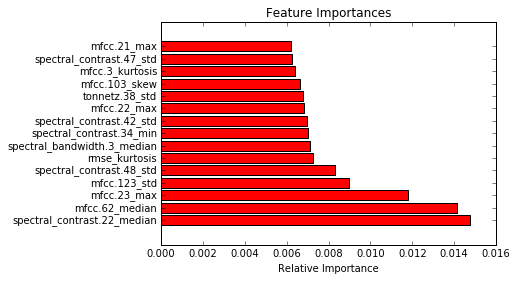

In [84]:
features = X_train.columns.values
importances = GBC.feature_importances_
indices = np.argsort(importances)[::-1][0:15]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices]) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

In [85]:
features[np.argsort(importances)[::-1]]

array(['spectral_contrast.22_median', 'mfcc.62_median', 'mfcc.23_max',
       'mfcc.123_std', 'spectral_contrast.48_std', 'rmse_kurtosis',
       'spectral_bandwidth.3_median', 'spectral_contrast.34_min',
       'spectral_contrast.42_std', 'mfcc.22_max', 'tonnetz.38_std',
       'mfcc.103_skew', 'mfcc.3_kurtosis', 'spectral_contrast.47_std',
       'mfcc.21_max', 'tonnetz.39_std', 'mfcc.24_max',
       'spectral_contrast.13_max', 'mfcc.75_median', 'tonnetz.28_min',
       'spectral_contrast.25_median', 'spectral_contrast_kurtosis',
       'spectral_contrast.33_min', 'mfcc.100_skew', 'mfcc.79_median',
       'rmse.6_std', 'spectral_contrast.5_kurtosis', 'mfcc.102_skew',
       'spectral_contrast.29_min', 'rmse.3_median',
       'spectral_contrast.36_skew', 'rmse.4_min', 'mfcc.65_median',
       'tonnetz.1_kurtosis', 'spectral_contrast.24_median', 'mfcc.82_min',
       'spectral_contrast.14_mean', 'spectral_contrast.31_min',
       'spectral_contrast.37_skew', 'mfcc.120_std', 'mfcc.59_me

In [86]:
GBC_pred = pd.crosstab(y_test, y_pred, rownames=['Actual Genres'], colnames=['Predicted Genres'])
GBC_pred

Predicted Genres,Electronic,Experimental,Folk,Rock
Actual Genres,,,,
Electronic,859,168,10,90
Experimental,142,1023,26,187
Folk,9,74,204,87
Rock,83,187,38,1622


In [87]:
GBC_pred.apply(lambda r: r/r.sum(), axis=1).round(2)

Predicted Genres,Electronic,Experimental,Folk,Rock
Actual Genres,,,,
Electronic,0.76,0.15,0.01,0.08
Experimental,0.10,0.74,0.02,0.14
Folk,0.02,0.20,0.55,0.23
Rock,0.04,0.10,0.02,0.84


In [88]:
import seaborn as sns

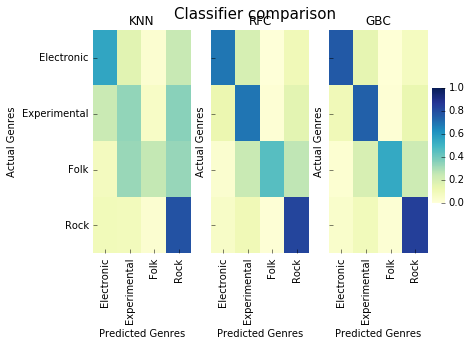

In [89]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91,.3,.03,.4])
sns.heatmap(KNN_pred.apply(lambda r: r/r.sum(), axis=1),ax=ax0,cbar=True,vmin=0,vmax=1,cbar_ax = cbar_ax, cmap="YlGnBu")
ax0.set_title('KNN')
sns.heatmap(RFC_pred.apply(lambda r: r/r.sum(), axis=1),ax=ax1,cbar=True,vmin=0,vmax=1,cbar_ax = cbar_ax, cmap="YlGnBu")
ax1.set_title('RFC')
sns.heatmap(GBC_pred.apply(lambda r: r/r.sum(), axis=1),ax=ax2,cbar=True,vmin=0,vmax=1,cbar_ax = cbar_ax, cmap="YlGnBu")
ax2.set_title('GBC')
fig.suptitle('Classifier comparison',fontsize=15)

plt.show()